# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course). 
- **Deadline is October 19**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name: Sadig Gojayev  
**Neptun ID: T1LNLN

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem. 

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualisations (any of the following: matplotlib, seaborn, tensorboard, ...) of the accuracy and loss and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
import torch
import torchvision #has various utils functions, including loading datasets
import torchvision.transforms as transforms #common image transformations
import torch.nn as nn #creating neural network
import torch.nn.functional as F #functional api for layers,...
import torch.optim as optim #for optimization algorithm
import matplotlib.pyplot as plt #for visualization
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
import numpy as np #for basic array operations

import os
import shutil

## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading the dataset
Show some images and labels of your dataset

In [ ]:
torchvision.datasets.Caltech101(root='./data',download=True)

0it [00:00, ?it/s]

Extracting ./data/caltech101/101_ObjectCategories.tar.gz to ./data/caltech101


0it [00:00, ?it/s]

Extracting ./data/caltech101/Annotations.tar to ./data/caltech101


Dataset Caltech101
    Number of datapoints: 8677
    Root location: ./data/caltech101
    Target type: ['category']

In [ ]:
#getting all classes with the number of images
path  = './data/caltech101/101_ObjectCategories/'
all_folders=os.listdir(path)
sizes=dict()
for folder in all_folders:
    sizes[folder]=len(os.listdir(path+'/'+folder))
sizes

{'gerenuk': 34,
 'scissors': 39,
 'okapi': 39,
 'cannon': 43,
 'tick': 49,
 'joshua_tree': 64,
 'umbrella': 75,
 'lobster': 41,
 'strawberry': 35,
 'ewer': 85,
 'mayfly': 40,
 'accordion': 55,
 'saxophone': 40,
 'binocular': 33,
 'starfish': 86,
 'electric_guitar': 75,
 'revolver': 82,
 'airplanes': 800,
 'barrel': 47,
 'elephant': 64,
 'ceiling_fan': 47,
 'brontosaurus': 43,
 'lamp': 61,
 'sea_horse': 57,
 'car_side': 123,
 'chandelier': 107,
 'headphone': 42,
 'scorpion': 84,
 'stapler': 45,
 'anchor': 42,
 'lotus': 66,
 'dollar_bill': 52,
 'sunflower': 85,
 'stop_sign': 64,
 'cougar_face': 69,
 'euphonium': 64,
 'pagoda': 47,
 'cup': 57,
 'gramophone': 51,
 'butterfly': 91,
 'menorah': 87,
 'hedgehog': 54,
 'camera': 50,
 'chair': 62,
 'pizza': 53,
 'wrench': 39,
 'Faces': 435,
 'beaver': 46,
 'brain': 98,
 'snoopy': 35,
 'windsor_chair': 56,
 'watch': 239,
 'minaret': 76,
 'Motorbikes': 798,
 'cellphone': 59,
 'pigeon': 45,
 'dolphin': 65,
 'yin_yang': 60,
 'kangaroo': 86,
 'Faces_

In [ ]:
#selecting classes with high number for getting better model
classes=['Faces', 'Leopards','Motorbikes', 'airplanes','watch' ]

#deleting other folders
for folder in os.listdir(path):
    if folder not in classes:
        shutil.rmtree(path+'/'+folder)

os.listdir(path)

['airplanes', 'Faces', 'watch', 'Motorbikes', 'Leopards']

In [ ]:
#transformation
transformations = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize((224, 224)),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
dataset = ImageFolder(path, transform = transformations)

#### Splitting the dataset

In [ ]:
print(len(dataset))

2472


In [ ]:
# 60,20,20 portion
train, validation, test= random_split(dataset, [1484, 494, 494])

In [ ]:
# Defining the random seed for torch
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
batch_size = 4

trainloader = DataLoader(train,batch_size=batch_size,shuffle=True, num_workers=2)
validationloader = DataLoader(validation,batch_size=batch_size, num_workers=2)
testloader = DataLoader(test,batch_size=batch_size,num_workers=2)

airplanes airplanes Motorbikes Motorbikes


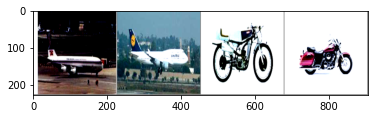

In [ ]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     #because images were normalized when loaded, for visualization purposes we unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #reorder the channels 
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
# show images
imshow(torchvision.utils.make_grid(images))

#### Pre-processing the dataset

In [ ]:
# ADD YOUR CODE HERE

## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the architecture

In [ ]:
# ADD YOUR CODE HERE#Set up GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)
print(resnet18)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet18_model = torchvision.models.resnet18(pretrained=True)
resnet18_model.fc=nn.Linear(resnet18_model.fc.in_features, out_features=len(classes))
resnet18_model =  resnet18_model.to(device)

#### Define your optimizer and loss function

In [ ]:
# ADD YOUR CODE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.0001,momentum=0.09)

#### Train your network

In [ ]:
class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=3, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = './caltech101_best_net.pth'

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            torch.save(resnet18_model.state_dict(), self.best_model)
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

early_stopping = EarlyStopping()

In [ ]:
def evaluate():
  running_loss = 0.0
  
  with torch.no_grad():
    for i, data in enumerate(validationloader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = resnet18_model(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()
  val_loss = running_loss / len(validationloader)
  print('val loss: %.3f' % (val_loss))
  return val_loss


def eval_acc(train=False):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      loader = trainloader if train else validationloader
      for data in loader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)
          # calculate outputs by running images through the network
          outputs = resnet18_model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  
  print('Accuracy of the network on the %s images: %d %%' % (
      'train' if train else 'test', 100 * correct / total))

In [ ]:
def train(NUM_EPOCHS):
  for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times
      print(f'Epoch {epoch+1}:')
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          #inputs, labels = data
          inputs, labels = data[0].to(device), data[1].to(device) #set for GPU if available

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = resnet18_model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 250 == 249: 
              print(f'Iteration {i}, loss = {(running_loss / 250):.3f}')
              running_loss = 0.0

      val_loss = evaluate()
      eval_acc()
      early_stopping(val_loss)
      if early_stopping.early_stop:
          break

  print('Finished Training')

#### Show results (accuracy and loss) on training and validation sets

In [ ]:
train(8)

Epoch 1:
Iteration 249, loss = 1.467
val loss: 1.068
Accuracy of the network on the test images: 64 %
INFO: Early stopping counter 1 of 3
Epoch 2:
Iteration 249, loss = 0.907
val loss: 0.801
Accuracy of the network on the test images: 74 %
INFO: Early stopping counter 2 of 3
Epoch 3:
Iteration 249, loss = 0.689
val loss: 0.652
Accuracy of the network on the test images: 80 %
INFO: Early stopping counter 3 of 3
INFO: Early stopping
Finished Training


In [ ]:
PATH = './caltech101.pth'
torch.save(resnet18_model.state_dict(), PATH)

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [ ]:
# ADD YOUR CODE HERE
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device) #set for GPU if available
        # inputs, labels = data
        # calculate outputs by running images through the network
        outputs = resnet18_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: {(100 * correct / total):.2f} %')

Accuracy of the network on the 494 test images: 84.41 %


#### Show some predictions

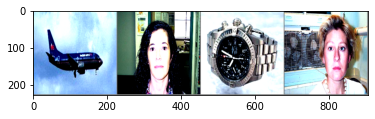

GroundTruth:  airplanes Faces watch Faces
Predicted:  airplanes Faces Motorbikes Faces


In [ ]:
dataiter = iter(testloader)
data = dataiter.next()
images = data[0]
labels = data[1]

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# images, labels = data[0].to(device), data[1].to(device)

#load model
model=torchvision.models.resnet18(pretrained=True)
model.fc=nn.Linear(model.fc.in_features, out_features=len(classes))
model.load_state_dict(torch.load(PATH), strict=False)
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

#### Answer the questions

In [ ]:
# ADD YOUR ANSWERS HERE


Test accuracy is 84.41% is good result, since it's between 70-90%

In [ ]:
eval_acc(train=True)

Accuracy of the network on the train images: 85 %


85% is close to test set result. It's not overfitting.